In [85]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pickle
from pickle import load

In [86]:
# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:Testy98962010').get_items()):
    if i>=100:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["Date_Created", "Number_of_Likes", "Source_of_Tweet", "Tweets"])

In [87]:
tweets_df.describe

<bound method NDFrame.describe of                 Date_Created  Number_of_Likes  Source_of_Tweet  \
0  2022-12-04 21:32:43+00:00                0  Twitter Web App   
1  2022-12-04 21:32:28+00:00                0  Twitter Web App   
2  2022-12-04 21:32:20+00:00                0  Twitter Web App   
3  2022-12-04 21:32:00+00:00                0  Twitter Web App   
4  2022-12-04 21:31:50+00:00                0  Twitter Web App   
..                       ...              ...              ...   
57 2022-12-04 21:18:54+00:00                0  Twitter Web App   
58 2022-12-04 21:18:39+00:00                0  Twitter Web App   
59 2022-12-04 21:18:27+00:00                0  Twitter Web App   
60 2022-12-04 10:42:22+00:00                0  Twitter Web App   
61 2022-12-04 10:36:46+00:00                0  Twitter Web App   

                                               Tweets  
0   I’m getting my dream car tomorrow. This is a h...  
1   At 30, I'm done.\nHey fuckers It's been one he...  
2   I

In [88]:
a=pd.to_datetime(tweets_df['Date_Created'])
a

0    2022-12-04 21:32:43+00:00
1    2022-12-04 21:32:28+00:00
2    2022-12-04 21:32:20+00:00
3    2022-12-04 21:32:00+00:00
4    2022-12-04 21:31:50+00:00
                ...           
57   2022-12-04 21:18:54+00:00
58   2022-12-04 21:18:39+00:00
59   2022-12-04 21:18:27+00:00
60   2022-12-04 10:42:22+00:00
61   2022-12-04 10:36:46+00:00
Name: Date_Created, Length: 62, dtype: datetime64[ns, UTC]

In [89]:
tweets_df

,Date_Created,Number_of_Likes,Source_of_Tweet,Tweets
0,2022-12-04 21:32:43+00:00,0,Twitter Web App,I’m getting my dream car tomorrow. This is a h...
1,2022-12-04 21:32:28+00:00,0,Twitter Web App,"At 30, I'm done.\nHey fuckers It's been one he..."
2,2022-12-04 21:32:20+00:00,0,Twitter Web App,I'm dating my dream partner and I feel like I'...
3,2022-12-04 21:32:00+00:00,0,Twitter Web App,I booked my first ever holiday in January 2023...
4,2022-12-04 21:31:50+00:00,0,Twitter Web App,Snoop Dogg's kid show about building emotional...
...,...,...,...,...
57,2022-12-04 21:18:54+00:00,0,Twitter Web App,My mother won't leave me alone. I'm DESPERATEL...
58,2022-12-04 21:18:39+00:00,0,Twitter Web App,"I (15M) got rejected by suicide hotline, wanna..."
59,2022-12-04 21:18:27+00:00,0,Twitter Web App,I am a extremely depressed M21 who sometimes t...
60,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!


<AxesSubplot:xlabel='Date_Created'>

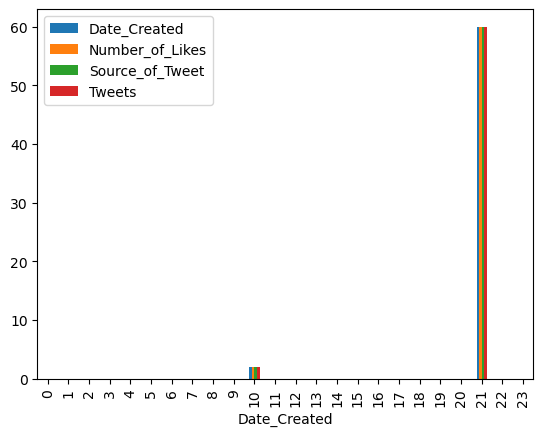

In [90]:
res = tweets_df.groupby(tweets_df["Date_Created"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")


# IMPORT MODEL AND SCALER

In [91]:
model = tf.keras.models.load_model('model.h5')
vectorizer = load(open('tokenizer.pkl', 'rb'))
 

In [92]:
TweetsToProcess=tweets_df['Tweets']

# Predict Tweets and add them to the dataframe

In [93]:
 #Apply scaler to data
x_test = pad_sequences(vectorizer.texts_to_sequences(TweetsToProcess), maxlen=300)

In [94]:
score = model.predict(x_test)

2/2 [==============================] - 1s 218ms/step


In [95]:
score

array([[0.02066787],
       [0.00959434],
       [0.09745753],
       [0.0086446 ],
       [0.01514261],
       [0.9826904 ],
       [0.26882964],
       [0.03471799],
       [0.9879385 ],
       [0.96578336],
       [0.38657907],
       [0.14849816],
       [0.01105361],
       [0.26840603],
       [0.00136493],
       [0.98760384],
       [0.9936177 ],
       [0.053576  ],
       [0.06472491],
       [0.98866814],
       [0.9922905 ],
       [0.92940193],
       [0.98391813],
       [0.2810352 ],
       [0.00451375],
       [0.08388916],
       [0.9971457 ],
       [0.9910775 ],
       [0.42892554],
       [0.0584348 ],
       [0.05672088],
       [0.9648184 ],
       [0.00794982],
       [0.00111202],
       [0.9957148 ],
       [0.7737954 ],
       [0.00166971],
       [0.00185061],
       [0.03298852],
       [0.90498877],
       [0.7033681 ],
       [0.00848798],
       [0.00284423],
       [0.00276866],
       [0.9825552 ],
       [0.681489  ],
       [0.00187505],
       [0.964

In [96]:
tweets_df["Predictions_Percentange"]=score

### If percentange is bigger than or equal to 0.5 then we can classify this tweet as a depressing one
### Rule of thumb the closer to 1 it gets the more depressing it is

In [97]:
tweets_df

,Date_Created,Number_of_Likes,Source_of_Tweet,Tweets,Predictions_Percentange
0,2022-12-04 21:32:43+00:00,0,Twitter Web App,I’m getting my dream car tomorrow. This is a h...,0.020668
1,2022-12-04 21:32:28+00:00,0,Twitter Web App,"At 30, I'm done.\nHey fuckers It's been one he...",0.009594
2,2022-12-04 21:32:20+00:00,0,Twitter Web App,I'm dating my dream partner and I feel like I'...,0.097458
3,2022-12-04 21:32:00+00:00,0,Twitter Web App,I booked my first ever holiday in January 2023...,0.008645
4,2022-12-04 21:31:50+00:00,0,Twitter Web App,Snoop Dogg's kid show about building emotional...,0.015143
...,...,...,...,...,...
57,2022-12-04 21:18:54+00:00,0,Twitter Web App,My mother won't leave me alone. I'm DESPERATEL...,0.896468
58,2022-12-04 21:18:39+00:00,0,Twitter Web App,"I (15M) got rejected by suicide hotline, wanna...",0.996210
59,2022-12-04 21:18:27+00:00,0,Twitter Web App,I am a extremely depressed M21 who sometimes t...,0.978648
60,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!,0.309132


In [98]:
tweets_df["Predictions"]=np.where(tweets_df['Predictions_Percentange']>=0.5, "Depression", "Non-Depression")


In [99]:
tweets_df

,Date_Created,Number_of_Likes,Source_of_Tweet,Tweets,Predictions_Percentange,Predictions
0,2022-12-04 21:32:43+00:00,0,Twitter Web App,I’m getting my dream car tomorrow. This is a h...,0.020668,Non-Depression
1,2022-12-04 21:32:28+00:00,0,Twitter Web App,"At 30, I'm done.\nHey fuckers It's been one he...",0.009594,Non-Depression
2,2022-12-04 21:32:20+00:00,0,Twitter Web App,I'm dating my dream partner and I feel like I'...,0.097458,Non-Depression
3,2022-12-04 21:32:00+00:00,0,Twitter Web App,I booked my first ever holiday in January 2023...,0.008645,Non-Depression
4,2022-12-04 21:31:50+00:00,0,Twitter Web App,Snoop Dogg's kid show about building emotional...,0.015143,Non-Depression
...,...,...,...,...,...,...
57,2022-12-04 21:18:54+00:00,0,Twitter Web App,My mother won't leave me alone. I'm DESPERATEL...,0.896468,Depression
58,2022-12-04 21:18:39+00:00,0,Twitter Web App,"I (15M) got rejected by suicide hotline, wanna...",0.996210,Depression
59,2022-12-04 21:18:27+00:00,0,Twitter Web App,I am a extremely depressed M21 who sometimes t...,0.978648,Depression
60,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!,0.309132,Non-Depression


## EDA & Insights

In [100]:
import plotly.express as px

## Splitting date time to get more features and insights 

In [101]:
    tweets_df['year'] = tweets_df['Date_Created'].dt.year


##Creating the month column form date time stamp.

    tweets_df['month'] = tweets_df['Date_Created'].dt.month


##Creating the day column form date time stamp.

    tweets_df['day'] = tweets_df['Date_Created'].dt.day


##Creating the hour column form date time stamp.

    tweets_df['hour'] = tweets_df['Date_Created'].dt.hour


In [102]:
tweets_df

,Date_Created,Number_of_Likes,Source_of_Tweet,Tweets,Predictions_Percentange,Predictions,year,month,day,hour
0,2022-12-04 21:32:43+00:00,0,Twitter Web App,I’m getting my dream car tomorrow. This is a h...,0.020668,Non-Depression,2022,12,4,21
1,2022-12-04 21:32:28+00:00,0,Twitter Web App,"At 30, I'm done.\nHey fuckers It's been one he...",0.009594,Non-Depression,2022,12,4,21
2,2022-12-04 21:32:20+00:00,0,Twitter Web App,I'm dating my dream partner and I feel like I'...,0.097458,Non-Depression,2022,12,4,21
3,2022-12-04 21:32:00+00:00,0,Twitter Web App,I booked my first ever holiday in January 2023...,0.008645,Non-Depression,2022,12,4,21
4,2022-12-04 21:31:50+00:00,0,Twitter Web App,Snoop Dogg's kid show about building emotional...,0.015143,Non-Depression,2022,12,4,21
...,...,...,...,...,...,...,...,...,...,...
57,2022-12-04 21:18:54+00:00,0,Twitter Web App,My mother won't leave me alone. I'm DESPERATEL...,0.896468,Depression,2022,12,4,21
58,2022-12-04 21:18:39+00:00,0,Twitter Web App,"I (15M) got rejected by suicide hotline, wanna...",0.996210,Depression,2022,12,4,21
59,2022-12-04 21:18:27+00:00,0,Twitter Web App,I am a extremely depressed M21 who sometimes t...,0.978648,Depression,2022,12,4,21
60,2022-12-04 10:42:22+00:00,0,Twitter Web App,It worked!,0.309132,Non-Depression,2022,12,4,10


## We're All Set Time To Explore Our Data!!

In [103]:
fig = px.bar(tweets_df, x="month", y="Predictions", color="Predictions", title="Long-Form Input")
fig.show();

## We want to take a look for the daily tweets of the user to see when the user is tweeting regularly and when his mood going low

In [104]:
fig = px.scatter(tweets_df , x="day", y="month",
       size="Predictions_Percentange", color="Predictions",
                 hover_name="Tweets", log_x=True, size_max=60)
fig.show()

## it make sense to zoom in and focus on the midnight .. since almost all of the tweets after midnight have that dark energy.

## Let's not wast time and do our plots and answer our questions!

## First, We Took  a Copy of The Hour Column Which is The Column We're Intrested in .

## in the same time we don't want our original data to get any change.

In [105]:
midnight = tweets_df[(tweets_df['hour'] <= 5 ) & (tweets_df['hour'] >= 0) ]


## We used the same plot to answer the question

In [106]:
fig = px.scatter(midnight , x="day", y="hour",
       size="Predictions_Percentange", color="Predictions",
                 hover_name="Tweets", log_x=True, size_max=60)
fig.show()